#### **Phase I**

#### 1. Problem & Target

#### feature說明
* CRIM：每個城鎮的人均犯罪率 (per capita crime rate by town)
* ZN：佔地25,000平方英尺以上的住宅區域比例(proportion of residential land zoned for lots over 25,000 sq.ft.)
* INDUS：每個城鎮非零售業的營業面積比例(proportion of non-retail business acres per town)
* CHAS：是否靠近河邊(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))
* NOX：一氧化氮濃度（ppm)(nitric oxides concentration (parts per 10 million))
* RM：每個住宅的平均房間數(average number of rooms per dwelling)
* AGE：1940年前私有住宅的住房比率(proportion of owner-occupied units built prior to 1940)
* DIS：與五個波士頓工做地區的加權距離(weighted distances to five Boston employment centres)
* RAD：徑向公路的通達指數(index of accessibility to radial highways)
* TAX：每10,000美元的所需繳的財產稅(full-value property-tax rate per $10,000)
* PTRATIO：每個城鎮的師生比例(pupil-teacher ratio by town)
* B：黑人比例(值為$1000\times(Bk-0.63)^2$)(1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)
* LSTAT：中下階級的比率(% lower status of the population)
* MEDV：該城鎮房價的中位數

#### 2. dataset

In [1]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from my_template import added_section_separate_line
from my_template import describe_skew_unvariate_distribution, visualize_features_hist, visualize_density_plot, visualize_box_whisker_plot
from my_template import detect_column_only_single_value, detect_column_very_few_value, detect_outlier_over3std, detect_outlier_quartile
from my_template import remove_duplicate_rows

In [2]:
## load dataset
filename = './dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filename, delim_whitespace=True, names=names)

In [3]:
## summarize data
print(f"dataset head: \n{df.head()}")
added_section_separate_line()
print(f"dataset shape: {df.shape}")
added_section_separate_line()
pd.set_option('precision', 1)
print(f"dataset description: \n{df.describe()}")
added_section_separate_line()
print("feaures skew:")
describe_skew_unvariate_distribution(df, df.columns)

dataset head: 
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
------------------------------
dataset shape: (506, 14)
------------------------------
dataset description: 
          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std  

Histogram of features:


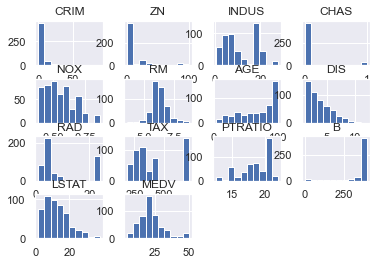

------------------------------
Density Plots of features:


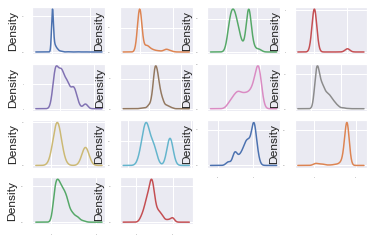

------------------------------
Box-whisker Plots of features:


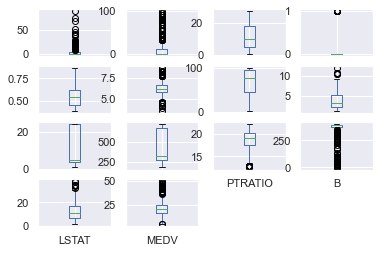

In [4]:
## data visualization
sns.set_theme(style="darkgrid")
visualize_features_hist(df, df.columns)
added_section_separate_line()
visualize_density_plot(df, df.columns, layout=(4,4))
added_section_separate_line()
visualize_box_whisker_plot(df, df.columns)

#### **Phase II** (Round 0)

#### 3. data processing

In [7]:
## data cleaning - remove duplicate
print(f"Origin shape: {df.shape}")
remove_duplicate_rows(df)
print(f"New shape: {df.shape}")

Origin shape: (506, 14)
--------------------
Before duplicate removed: (506, 14)
After duplicate removed: (506, 14)
New shape: (506, 14)


* 因為具有完全一樣特徵數值的town可以說是完全沒有(機率極低)，故考慮刪除duplicate是有必要的

In [8]:
## data cleaning - data detection to remove
detect_column_only_single_value(df)
added_section_separate_line()
detect_column_very_few_value(df)
added_section_separate_line()
for col in df.columns[:-1]:
    print(f"Feature ({col}):", end=" ")
    detect_outlier_over3std(df, col)
added_section_separate_line()
for col in df.columns[:-1]:
    print(f"Feature ({col}):", end=" ")
    detect_outlier_quartile(df, col)

Record columns to delete (only single value): []
------------------------------
Record columns to delete (very few value): [3]
------------------------------
Feature (CRIM): Identified outliers: 8, Non-outlier observation: 506
Feature (ZN): Identified outliers: 14, Non-outlier observation: 506
Feature (INDUS): Identified outliers: 0, Non-outlier observation: 506
Feature (CHAS): Identified outliers: 35, Non-outlier observation: 506
Feature (NOX): Identified outliers: 0, Non-outlier observation: 506
Feature (RM): Identified outliers: 8, Non-outlier observation: 506
Feature (AGE): Identified outliers: 0, Non-outlier observation: 506
Feature (DIS): Identified outliers: 5, Non-outlier observation: 506
Feature (RAD): Identified outliers: 0, Non-outlier observation: 506
Feature (TAX): Identified outliers: 0, Non-outlier observation: 506
Feature (PTRATIO): Identified outliers: 0, Non-outlier observation: 506
Feature (B): Identified outliers: 25, Non-outlier observation: 506
Feature (LSTAT): Id

* 無出現single value的column
* 出現1個very few value的column(CHAS)，但觀察其特徵數值型態應為Boolean，故為正常，不需刪除
* 針對Outlier，因為其不完全代表anomaly，暫時保留，待後續如有需要再各別分析可刪除的部分

#### 4. model & validation

In [10]:
## parameter setting
seed = 87
num_folds = 10
scoring = 'neg_mean_squared_error'

In [11]:
## split-out validation dataset
data = df.values
X = data[:, :13]
y = data[:, 13]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [12]:
## spot check algorithms
models = list()
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
results= list()
names = list()
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

LR: -23.787 (6.773)
LASSO: -28.548 (9.215)
EN: -27.778 (8.871)
KNN: -38.186 (15.446)
CART: -23.568 (21.667)
SVR: -63.429 (21.979)


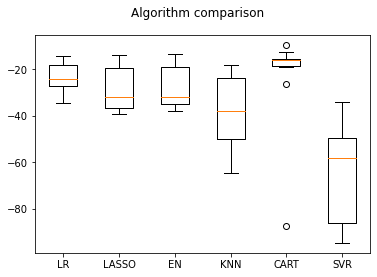

In [17]:
## compare algorithms
fig = plt.figure()
fig.suptitle("Algorithm comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* 小結：
    * 1) 可看出驗證結果差異頗大，合理懷疑是特徵間的scale差異造成影響model，特別是KNN和SVR
    * 2) 或需針對feature進行data transform

#### Phase II (Round 1：利用pipeline來加入data transform後再進行model training)

In [19]:
## parameter setting
seed = 87
num_folds = 10
scoring = 'neg_mean_squared_error'

In [18]:
## create pipeline
pipelines = list()
pipelines.append(('ScaledLR', Pipeline([('Scaler',StandardScaler()), ('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler',StandardScaler()), ('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler',StandardScaler()), ('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler',StandardScaler()), ('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler',StandardScaler()), ('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler',StandardScaler()), ('SVR',SVR())])))

In [20]:
## model training (using k-fold)
results= list()
names = list()
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

ScaledLR: -23.787 (6.773)
ScaledLASSO: -29.530 (8.185)
ScaledEN: -30.150 (10.655)
ScaledKNN: -23.040 (7.320)
ScaledCART: -23.694 (18.565)
ScaledSVR: -30.636 (12.523)


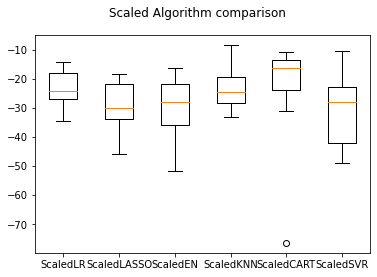

In [21]:
## visualize trained model
fig = plt.figure()
fig.suptitle("Scaled Algorithm comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* 小結：
    * 1) 驗證結果model間差異縮小
    * 2) KNN表現最好，可再針對其超參數進行驗證

#### **Phase II** (Round 2：針對KNN超參數鄰近點數k進行驗證)

In [25]:
## parameter setting
seed = 87
num_folds = 10
scoring = 'neg_mean_squared_error'

In [23]:
## data transform
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

In [24]:
## 驗證超參數k
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with : {param}")

Best: -19.316 using {'n_neighbors': 3}
-24.333 (13.326) with : {'n_neighbors': 1}
-19.316 (7.562) with : {'n_neighbors': 3}
-22.922 (7.228) with : {'n_neighbors': 5}
-22.363 (8.042) with : {'n_neighbors': 7}
-22.499 (7.997) with : {'n_neighbors': 9}
-22.295 (8.574) with : {'n_neighbors': 11}
-22.837 (8.812) with : {'n_neighbors': 13}
-23.203 (9.243) with : {'n_neighbors': 15}
-24.005 (10.095) with : {'n_neighbors': 17}
-24.702 (10.254) with : {'n_neighbors': 19}
-25.588 (10.785) with : {'n_neighbors': 21}


* KNN鄰近點k=3表現最佳

#### **Phase II** (Round 3：測試emsemble algorithms)

In [26]:
## parameter setting
seed = 87
num_folds = 10
scoring = 'neg_mean_squared_error'

In [27]:
## create pipeline - 進行data transform & model selection
ensembles = list()
ensembles.append(('ScaledAB', Pipeline([('Scaler',StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler',StandardScaler()), ('AB', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler',StandardScaler()), ('AB', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler',StandardScaler()), ('AB', ExtraTreesRegressor(n_estimators=10))])))

In [29]:
## model training
results = list()
names = list()
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds,random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

ScaledAB: -16.444 (7.382)
ScaledGBM: -11.907 (6.801)
ScaledRF: -15.709 (11.443)
ScaledET: -13.507 (5.779)


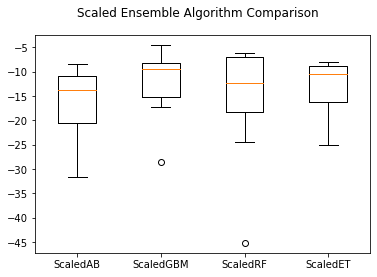

In [31]:
## visualize model
fig = plt.figure()
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* 小結：
    * 1) 使用emsemble algorithm驗證的效果普遍比較好
    * 2) 其中以GBM(gradient boosting)為最佳

#### **Phase II** (Round 4：Tune GBM超參數)

In [32]:
## parameter setting
seed = 87
num_folds = 10
scoring = 'neg_mean_squared_error'

In [33]:
## data transform
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

In [35]:
## tune hyperparameter: n_estimators
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print(f"Best: {grid_result.best_score_:.3f} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with : {param}")

Best: -11.789 using {'n_estimators': 250}
-12.535 (6.898) with : {'n_estimators': 50}
-12.005 (7.080) with : {'n_estimators': 100}
-11.792 (7.179) with : {'n_estimators': 150}
-11.805 (7.324) with : {'n_estimators': 200}
-11.789 (7.340) with : {'n_estimators': 250}
-11.795 (7.392) with : {'n_estimators': 300}
-11.824 (7.488) with : {'n_estimators': 350}
-11.828 (7.513) with : {'n_estimators': 400}


* 小結：
    * 1) 調整超參數n_estimators=250為最佳

* Phase II結論：
    * 1) 使用gradient boosting regressor algorithm進行訓練
    * 2) 超參數設定：n_estimators=250

#### **Phase III**

#### 5. prediction

In [36]:
## parameter setting
seed = 87

In [37]:
## predict using GBM model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=250)
model.fit(rescaledX, y_train)
rescaledTestX = scaler.transform(X_test)
y_pred = model.predict(rescaledTestX)
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.3f}")

mean squared error: 7.535
